# Reporting on sales data


## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [24]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [3]:
# QUESTION 1: WHAT ARE THE TOTAL SALES FOR EACH PAYMENT METHOD
df.groupby('payment')[['total']].sum()

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [4]:
# QUESTION 2: WHAT IS THE AVERAGE UNIT PRICE FOR EACH PRODUCT LINE
df.groupby('product_line')[['unit_price']].mean()

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


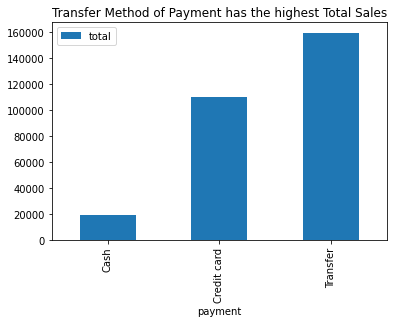

In [5]:
# QUESTION 3: CREATE PLOTS TO VISUALIZE FINDINGS FOR QUESTION 1
total_sales = df.groupby('payment')[['total']].sum()
total_sales.plot(kind = 'bar')
plt.title("Transfer Method of Payment has the highest Total Sales")
plt.show()

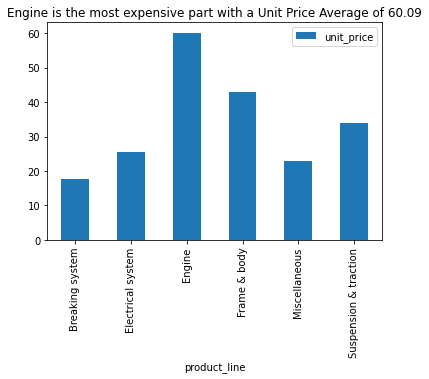

In [6]:
## QUESTION 3.1: CREATE PLOTS TO VISUALIZE FINDINGS FOR QUESTION 2
avg_unitPrice = df.groupby('product_line')[['unit_price']].mean()
avg_unitPrice.plot(kind = 'bar')
plt.title("Engine is the most expensive part with a Unit Price Average of 60.09")
plt.show()

In [7]:
#QUESTION 4:Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

#4.1 total purchase value by product line
df.groupby('product_line')[['total']].sum()

,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


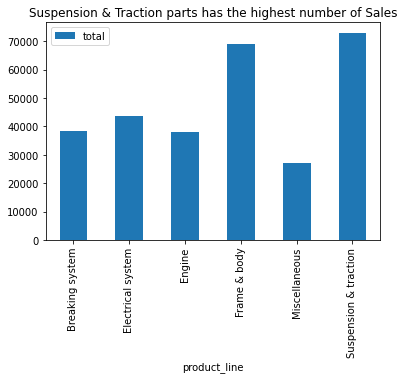

In [9]:
productline_sales = df.groupby('product_line')[['total']].sum()
productline_sales.plot(kind = 'bar')
plt.title("Suspension & Traction parts has the highest number of Sales")
plt.show()

4.1 Warehouse sales grouped by the months - Which warehouse had the highest sales

In [35]:
# Get the month from the date column
df['month'] = df['date'].dt.month

In [33]:
## What month had the highest sales
df.groupby(['month'])[['total']].sum()

,total
month,
6,95320.03
7,93547.91
8,100245.06


In [36]:
# distribution of sales across the warehouses
df.groupby(['warehouse'])[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


In [37]:
#distribution of sales by month in each warehouse
df.groupby(['month','warehouse'])[['total']].sum()

total
month warehouse          
6     Central    44128.96
      North      33318.43
      West       17872.64
7     Central    48269.70
      North      29122.94
      West       16155.27
8     Central    49584.22
      North      37762.26
      West       12898.58

In [38]:
##Breakdown of each product line sales in each warehouse
sales_table = pd.pivot_table(df, values = 'total', index = ['warehouse'], columns = ['product_line'], aggfunc = np.sum)
sales_table

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
warehouse,,,,,,
Central,17792.53,21994.56,27263.14,30040.56,12220.88,32671.21
North,10588.13,15247.27,7236.73,28397.86,8618.67,30114.97
West,9969.49,6370.88,3445.51,10586.31,6326.27,10228.03


In [39]:
## How Many Products were SOLD
df.groupby(['month'])[['quantity']].sum()

,quantity
month,
6,3044
7,3160
8,3191


In [40]:
# distribution of quantity sales across the warehouses
df.groupby(['warehouse'])[['quantity']].sum()

,quantity
warehouse,
Central,4527
North,3254
West,1614


In [67]:
## Product line breakdown by sales and quantity
df.groupby('product_line')[['total', 'quantity']].sum()

,total,quantity
product_line,,
Breaking system,38350.15,2130
Electrical system,43612.71,1698
Engine,37945.38,627
Frame & body,69024.73,1619
Miscellaneous,27165.82,1176
Suspension & traction,73014.21,2145


In [68]:
## Breakdown of each product line quantity sales in each warehouse
quantitySales_table = pd.pivot_table(df, values = 'quantity', index = ['warehouse'], columns = ['product_line'], aggfunc = np.sum)
quantitySales_table

product_line,Breaking system,Electrical system,Engine,Frame & body,Miscellaneous,Suspension & traction
warehouse,,,,,,
Central,1024,838,449,698,538,980
North,605,607,122,675,379,866
West,501,253,56,246,259,299


Summary of Findings

- By Payment Method, Transfer had the highest transactions totaling to 159,642. Cash transactions were the least.

- In the product lines, the engine is the most expensive part with an average unit price of 60

- When we look at the total sales of each product line; Suspension & traction parts take the lead with 73K sales

- If we drill down per month; August has the highest amount of sales (100K) with 3191 products sold followed by June with 95K sales and 3160 products sold. July had the least amount of sales (93K)

- If we look at warehouses, the Central Warehouse is doing really well. It has the highest total amount of purchases(142K). The West warehouse has the least total amount of purchases(47K)
